In [6]:
import sys
sys.path.append("../../src")

import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

from models import Cubesat
from maneuvers import Maneuvers
from coordinates import cart2kep
import constants
import auxiliary

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

In [14]:
coe,date = auxiliary.parseTle("../../suchai0.tle")

#----- SPACECRAFT DEFINITIONS -----
satellite = Cubesat("1U")

# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers.addPerturbation("atmosphere")
%time maneuvers.propagate(60*60*24*400,60,max_step=60)

Propagating...from day  0.0  to  400.0
The solver successfully reached the end of the integration interval. (Status Code: 0)

Wall time: 8min 54s


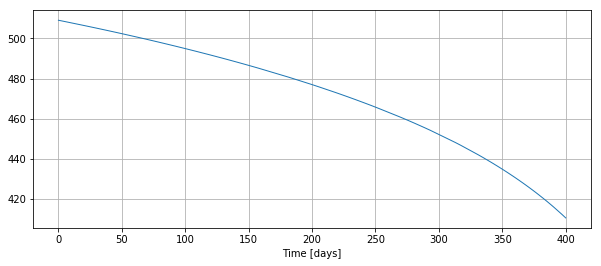

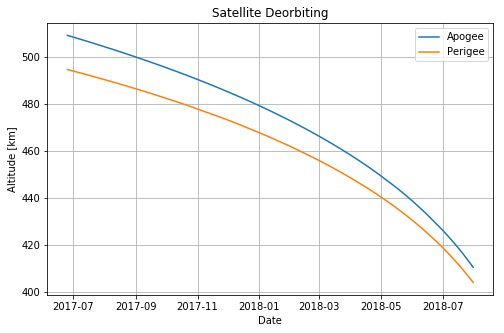

In [18]:
# CALCULATE PERIGEES AND APOGEES
perigees = (1-maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]
apogees = (1+maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]

maneuvers.plot("singleItem",(apogees-constants.Re)/1e3)

#PLOTTING
plt.figure(figsize=(8,5))
plt.plot(maneuvers.history.datetime,(apogees-constants.Re)/1e3, label="Apogee");
plt.plot(maneuvers.history.datetime,(perigees-constants.Re)/1e3, label="Perigee");
plt.grid();
plt.legend();
plt.title("Satellite Deorbiting")
plt.ylabel("Altitude [km]")
plt.xlabel("Date")
mplcursors.cursor(hover=True);